In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
url = "https://delvex-software-center.s3.ap-south-1.amazonaws.com/USGS/all_month.csv"
df = pd.read_csv(url)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9593 entries, 0 to 9592
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             9593 non-null   object 
 1   latitude         9593 non-null   float64
 2   longitude        9593 non-null   float64
 3   depth            9593 non-null   float64
 4   mag              9592 non-null   float64
 5   magType          9592 non-null   object 
 6   nst              8018 non-null   float64
 7   gap              8018 non-null   float64
 8   dmin             8017 non-null   float64
 9   rms              9592 non-null   float64
 10  net              9593 non-null   object 
 11  id               9593 non-null   object 
 12  updated          9593 non-null   object 
 13  place            9593 non-null   object 
 14  type             9593 non-null   object 
 15  horizontalError  7317 non-null   float64
 16  depthError       9592 non-null   float64
 17  magError      

In [4]:
# choose columns
features = ['latitude','longitude','depth']
label = 'mag'

In [5]:
# drop rows missing target
df = df.dropna(subset=[label])

In [6]:
# impute missing input values
for col in features:
    df.loc[col] = df[col].fillna(df[col].median())

In [7]:
x = df[features]
y = df[label]

In [8]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9595 entries, 0 to depth
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   9594 non-null   float64
 1   longitude  9593 non-null   float64
 2   depth      9592 non-null   float64
dtypes: float64(3)
memory usage: 299.8+ KB


In [9]:
y.info()

<class 'pandas.core.series.Series'>
Index: 9595 entries, 0 to depth
Series name: mag
Non-Null Count  Dtype  
--------------  -----  
9592 non-null   float64
dtypes: float64(1)
memory usage: 149.9+ KB


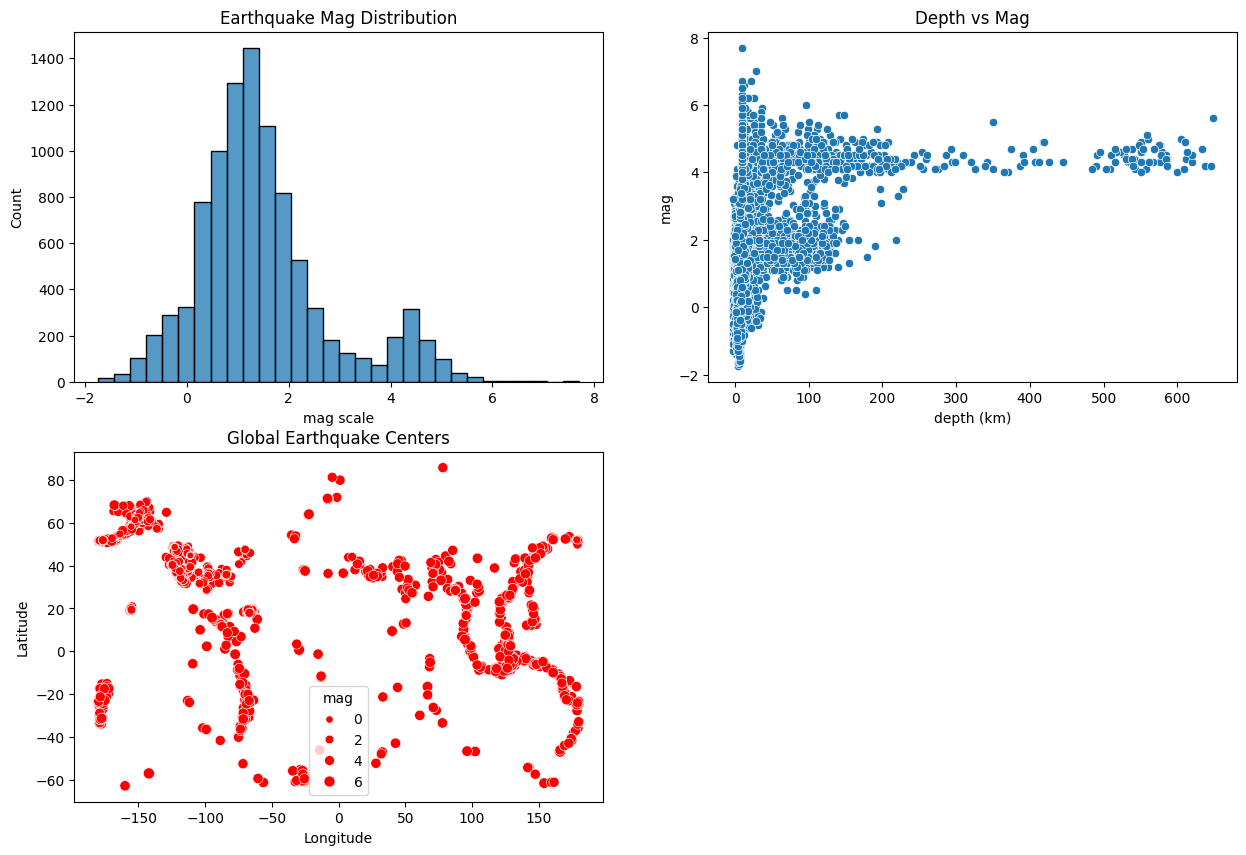

In [41]:
import seaborn as sb


plt.figure(figsize=(15,10))

# subplots
plt.subplot(2,2,1)
sb.histplot(df[label], bins=30)
plt.title("Earthquake Mag Distribution")
plt.xlabel('mag scale')

plt.subplot(2,2,2)
sb.scatterplot(data=df, x='depth', y='mag')
plt.title("Depth vs Mag")
plt.xlabel("depth (km)")
plt.ylabel("mag")

plt.subplot(2,2,3)
sb.scatterplot(data=df, x='longitude', y='latitude', size = y, color='red')
plt.title("Global Earthquake Centers")
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

